In [717]:
%load_ext autoreload
%autoreload 2
import glob
#from cleaning_data import cleaning_match
import pandas as pd
from feature_extraction import extracting_total_outs_per_batsman, runs_per_season, all_features, player_info, extracting_age
from cleaning_data import concating_dataframes, cleaning_replacing
from train_test import train_and_test
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [218]:
all_df = concating_dataframes('../../capstone_project/ipl_csv/Data/trial/')

In [219]:
train, test = train_and_test(2016, 2016)

/Users/panesar47/galvanize/Performance-predictor-IPL/src/feature_extraction.py:63: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1
/Users/panesar47/galvanize/Performance-predictor-IPL/src/train_test.py:119: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df['ball']=1


In [1100]:
reg_X = train.copy()

In [1101]:
### drop all duplicates like brandon mccullum and ganguly!!

In [1102]:
## counting seasonns for player and keeping only 5 or more

In [1103]:
reg_X = reg_X.drop_duplicates()

In [1104]:
reg_X = reg_X.sort_values(['player_id', 'season'])

In [1105]:
reg_X = reg_X[reg_X.batsman_striker != 'BB McCullum']

In [1106]:
from collections import Counter
cnt = Counter()

In [1107]:
# settign up counter to count seasons for each [erson]

In [1108]:
for player in reg_X.batsman_striker:
    cnt[player] += 1

    
    

a = pd.DataFrame.from_dict(cnt, orient = 'index').reset_index()

a = a.sort_values(0, ascending=False).reset_index()

a = a.rename(columns={'level_0':'player_id', 'index':'batsman_striker', 0:'seasons_played'})

a.drop('player_id',axis= 1 ,inplace= True)

reg_X = pd.merge(reg_X, a, on= 'batsman_striker', how='outer')
#reg_X['total_seasons_played']= reg_X['seasons_played']-1








In [1109]:
reg_X['total_seasons_played']= reg_X['seasons_played']-1


In [1110]:
reg_X.drop(columns='seasons_played', axis=1, inplace=True)




In [1111]:
## keeps only batsman player 2016 and more that 5

In [1112]:
reg_X = reg_X[reg_X.total_seasons_played >= 5]

In [1113]:
## making sure to keep batsman just from 2016

In [1114]:
batin_y = reg_X[reg_X.season ==2016]

batin_y = batin_y[['batsman_striker']]

reg_X = reg_X.merge(batin_y, on='batsman_striker')

In [1115]:
reg_y = reg_X[reg_X.season == 2016]

reg_X = reg_X[reg_X.season != 2016]

In [1116]:
#calculating runs per match

In [1117]:
average_upto_2015= (reg_X.groupby(['batsman_striker', 'season','total_seasons_played']).sum()).reset_index()

In [1118]:
average_upto_2015['runs_per_match_avg'] = average_upto_2015['runs_scored']/average_upto_2015['matches']

In [1119]:
average_upto_2015.head()

,batsman_striker,season,total_seasons_played,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg
0,A Mishra,2008,8,9,42,3,37,3.0,31,12.33,88.10,4.00,80.00,16.50,89.19,1.0,1.0,0.0,0.0,0.0,0,0,0,1,0,0,0,0,0,0,0,1,26,12.333333
1,A Mishra,2009,8,9,20,5,26,3.0,13,8.67,130.00,0.67,25.00,0.00,200.00,3.0,0.0,0.0,0.0,2.0,0,0,0,1,0,0,0,0,0,0,0,1,27,5.200000
2,A Mishra,2010,8,9,54,7,39,4.0,12,9.75,72.22,0.00,106.67,5.75,58.97,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,28,5.571429
3,A Mishra,2011,8,9,52,9,68,4.0,25,17.00,130.77,6.67,166.67,48.00,120.00,4.0,0.0,0.0,0.0,3.0,0,0,0,1,0,0,0,0,0,0,0,1,29,7.555556
4,A Mishra,2012,8,9,21,5,16,3.0,8,5.33,76.19,2.67,50.00,0.00,160.00,3.0,0.0,0.0,0.0,1.0,0,0,0,1,0,0,0,0,0,0,0,1,30,3.200000


In [1120]:
# calculating averge runs per match for whole career (runspermatchavg / seasons)

In [1121]:
average_upto_2015= (average_upto_2015.groupby(['batsman_striker','total_seasons_played']).sum()).reset_index()

In [1122]:
average_upto_2015['career_runs_match']= average_upto_2015['runs_per_match_avg']/ average_upto_2015['total_seasons_played']

In [1123]:
average_upto_2015 = average_upto_2015.rename(columns={'total_seasons_played':'career_age'})

In [1124]:
average_upto_2015.head(20)

,batsman_striker,career_age,season,player_id,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age,runs_per_match_avg,career_runs_match
0,A Mishra,8,16092,72,312,41,287,26.0,127,75.91,702.37,33.51,570.84,86.75,870.66,20.0,2.0,0.0,0.0,8.0,0,0,0,8,0,0,0,0,0,0,0,8,236,52.693651,6.586706
1,A Nehra,6,12067,72,62,16,40,7.0,36,27.25,349.49,1.00,181.67,3.50,289.75,6.0,0.0,0.0,0.0,7.0,0,0,0,6,0,0,0,0,0,0,0,6,193,19.500000,3.250000
2,AB de Villiers,8,16092,200,1816,93,2583,70.0,591,280.93,1087.53,356.60,1171.21,227.59,987.60,43.0,16.0,14.0,4.0,7.0,0,0,0,0,0,0,0,8,0,0,0,8,212,209.668498,26.208562
3,AJ Finch,6,12075,222,769,39,911,37.0,241,124.66,615.49,117.00,502.40,78.75,544.35,23.0,5.0,5.0,1.0,3.0,6,0,0,0,0,0,0,0,0,0,0,6,159,120.340659,20.056777
4,AM Rahane,7,14082,287,1887,75,2195,65.0,452,198.20,724.57,204.54,718.86,200.18,646.21,41.0,11.0,9.0,5.0,6.0,0,0,0,7,0,0,0,0,0,0,0,7,166,171.613858,24.516265
5,AT Rayudu,6,12075,312,1600,88,1991,73.0,357,168.53,755.67,147.76,754.68,181.57,715.84,43.0,18.0,10.0,1.0,5.0,0,0,0,6,0,0,0,0,0,0,0,6,165,135.839881,22.639980
6,B Kumar,5,10065,310,128,23,111,12.0,48,38.76,464.78,7.00,221.43,28.40,420.94,10.0,0.0,0.0,0.0,3.0,0,0,0,5,0,0,0,0,0,0,0,5,110,17.944444,3.588889
7,CH Gayle,7,14084,616,2201,81,3224,70.0,715,310.07,986.81,306.73,1010.96,300.12,925.55,42.0,15.0,4.0,12.0,3.0,0,0,0,0,0,0,0,0,0,7,0,0,231,263.603175,37.657596
8,DA Warner,7,14084,742,1861,83,2525,75.0,602,233.50,950.54,196.56,814.41,244.76,982.77,38.0,11.0,12.0,4.0,6.0,7,0,0,0,0,0,0,0,0,0,0,0,182,209.327298,29.903900
9,DJ Bravo,8,16092,896,944,69,1163,47.0,304,159.80,1172.42,171.33,1266.49,158.02,726.69,30.0,10.0,4.0,0.0,1.0,0,0,0,0,0,0,0,0,0,8,0,8,228,116.624405,14.578051


In [1125]:
average_upto_2015 = average_upto_2015[['batsman_striker', 'career_runs_match', 'career_age']]

In [1126]:
#making  y  matric

In [1127]:
reg_y = (reg_y.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_y['runs_per_match']= reg_y['runs_scored'] / reg_y['matches']

reg_y = reg_y[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_y = (reg_y.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))

reg_y.reset_index()

y = reg_y[('runs_per_match',2016)].values

In [1128]:
#making X matrics

In [1260]:
reg_x = (reg_X.groupby(['player_id', 'batsman_striker', 'season']).sum()).reset_index()

reg_x['runs_per_match']= reg_x['runs_scored'] / reg_x['matches']

reg_x = reg_x[['player_id', 'batsman_striker', 'season', 'age', 'runs_per_match']]

reg_x = (reg_x.pivot_table(index=['player_id', 'batsman_striker'], columns=['season'], values=['runs_per_match', 'age']))
reg_x = reg_x.reset_index()

# reg_x = reg_x.merge(average_upto_2015, on=['batsman_striker'], how='outer')

# reg_x = reg_x.fillna('')

# l = []
# l1 = []
# l3 = []

# l = []
# for i in range(len(reg_x)):
#     l.append(reg_x.iloc[i][11:19])
#     for value in l:
#         if type(value)== str:
#             print(True)
#         else:
#             l1.append(value)
#     print(l1)
            
    
    
   # reg_x['std']= l


# for i in range(len(st)):
#     l.append(reg_x.iloc[i][11:19])
#     for value in l:
#         if type(value)==str:
#             pass
#         else:
#             l1.append(value)
#     l3.append(stats.tstd(l1))

#reg_x['std']= l3



# reg_y = reg_y.sort_values('player_id', ascending=True)

# reg_x = reg_x.sort_values(('player_id', ''), ascending=True)

# reg_x.drop(('batsman_striker', ''), axis=1, inplace=True)

# reg_x.drop('batsman_striker', axis=1, inplace=True)

In [1261]:
reg_x_std = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

In [1262]:
reg_x_std = reg_x_std.T.fillna(reg_x.mean(axis=1)).T


In [1224]:
reg_x.pivot_table(index=['player_id', 'batsman_striker'], values=['runs_per_match', 'age'])

/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:3108: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


age                                            \
season                     2008  2009  2010  2011  2012  2013  2014  2015   
player_id batsman_striker                                                   
9         A Mishra         26.0  27.0  28.0  29.0  30.0  31.0  32.0  33.0   
12        A Nehra          29.0  30.0  31.0   NaN  33.0  34.0   NaN  36.0   
25        AB de Villiers   23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0   
37        AJ Finch          NaN   NaN  24.0  25.0  26.0  27.0  28.0  29.0   
41        AM Rahane        20.0  21.0   NaN  23.0  24.0  25.0  26.0  27.0   
52        AT Rayudu         NaN   NaN  25.0  26.0  27.0  28.0  29.0  30.0   
62        B Kumar           NaN   NaN   NaN  20.0  21.0  22.0  23.0  24.0   
88        CH Gayle          NaN  30.0  31.0  32.0  33.0  34.0  35.0  36.0   
106       DA Warner         NaN  23.0  24.0  25.0  26.0  27.0  28.0  29.0   
112       DJ Bravo         25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0   
128       DR Smith         25.0  26.0  27.0   NaN  29.0  30.0  31.0  32.0   
129       DS Kulkarni      20.0  21.0   NaN  23.0  24.0   NaN  26.0  27.0   
133       DW Steyn         25.0  26.0  27.0  28.0  29.0  30.0  31.0  32.0   
140       G Gambhir        27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0   
154       Harbhajan Singh  28.0  29.0  30.0  31.0  32.0  33.0  34.0  35.0   
160       IK Pathan        24.0  25.0  26.0  27.0  28.0  29.0  30.0   NaN   
163       Iqbal Abdulla    19.0   NaN  21.0  22.0  23.0  24.0   NaN  26.0   
171       JA Morkel        27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0   
185       JP Duminy         NaN  25.0  26.0  27.0  28.0   NaN  30.0  31.0   
193       KA Pollard        NaN   NaN  23.0  24.0  25.0  26.0  27.0  28.0   
198       KD Karthik       23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0   
204       KM Jadhav         NaN   NaN  24.0  25.0   NaN  27.0  28.0  29.0   
231       M Morkel          NaN  25.0  26.0  27.0  28.0  29.0  30.0  31.0   
235       M Vijay           NaN  25.0  26.0  27.0  28.0  29.0  30.0  31.0   
238       MA Agarwal        NaN   NaN   NaN  19.0  20.0  21.0  22.0  23.0   
241       MC Henriques      NaN  21.0  22.0   NaN   NaN  25.0  26.0  27.0   
252       MK Pandey        19.0  20.0  21.0  22.0  23.0  24.0  25.0  26.0   
262       MS Dhoni         27.0  28.0  29.0  30.0  31.0  32.0  33.0  34.0   
283       NV Ojha           NaN  26.0  27.0  28.0  29.0  30.0  31.0  32.0   
288       P Kumar          22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0   
292       PA Patel         22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0   
299       PP Chawla        20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0   
307       R Ashwin          NaN  23.0  24.0  25.0  26.0  27.0  28.0  29.0   
308       R Bhatia         29.0  30.0  31.0  32.0  33.0  34.0  35.0  36.0   
319       R Vinay Kumar    23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0   
320       RA Jadeja        20.0  21.0   NaN  23.0  24.0  25.0  26.0  27.0   
326       RG Sharma        21.0  22.0  23.0  24.0  25.0  26.0  27.0  28.0   
343       RV Uthappa       23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0   
350       S Dhawan         23.0  24.0  25.0  26.0  27.0  28.0  29.0  30.0   
355       S Nadeem          NaN   NaN   NaN  22.0  23.0  24.0  25.0  26.0   
375       SE Marsh         25.0   NaN  27.0  28.0  29.0  30.0  31.0  32.0   
377       SK Raina         22.0  23.0  24.0  25.0  26.0  27.0  28.0  29.0   
393       SR Watson        27.0   NaN  29.0  30.0  31.0  32.0  33.0  34.0   
396       SS Tiwary        19.0  20.0  21.0  22.0  23.0  24.0   NaN  26.0   
398       STR Binny         NaN   NaN  26.0  27.0  28.0  29.0  30.0  31.0   
430       UBT Chand         NaN   NaN   NaN  17.0  18.0  19.0  20.0  21.0   
432       UT Yadav          NaN   NaN  23.0  24.0  25.0  26.0  27.0  28.0   
434       V Kohli          20.0  21.0  22.0  23.0  24.0  25.0  26.0  27.0   
449       WP Saha          24.0  25.0  26.0  27.0  28.0  29.0  30.0  31.0   
457       YK Pathan     

In [1265]:
reg_x_std.head()

player_id batsman_striker runs_per_match                             \
season                                     2008     2009     2010     2011   
0              9        A Mishra        12.3333      5.2  5.57143  7.55556   
1             12         A Nehra              1        1     11.5  17.2692   
2             25  AB de Villiers        15.8333  35.7692  15.8571       24   
3             37        AJ Finch        24.3339  24.3339       21  7.83333   
4             41       AM Rahane              2  20.5714  25.2409  17.1429   

                                            
season     2012     2013     2014     2015  
0           3.2  14.8333        2        2  
1           5.5     0.25  17.2692     0.25  
2       24.5385  26.6429  30.3846  36.6429  
3          27.5  32.5714  23.7692  7.66667  
4            35  27.1111    28.25  41.5385

In [1266]:
l = []
for i in range(len(reg_x_std)):
    l.append(stats.tstd(reg_x_std.iloc[i][3:10]))
reg_x_std['std']= l

# made the standard devoation, load merge it into x and run LR

In [1267]:
reg_x_std

player_id  batsman_striker runs_per_match                             \
season                                      2008     2009     2010     2011   
0              9         A Mishra        12.3333      5.2  5.57143  7.55556   
1             12          A Nehra              1        1     11.5  17.2692   
2             25   AB de Villiers        15.8333  35.7692  15.8571       24   
3             37         AJ Finch        24.3339  24.3339       21  7.83333   
4             41        AM Rahane              2  20.5714  25.2409  17.1429   
5             52        AT Rayudu        27.1415  27.1415  25.4286  24.6875   
6             62          B Kumar        17.2677  17.2677  17.2677        1   
7             88         CH Gayle        38.8402  26.2857  32.4444  50.6667   
8            106        DA Warner        33.1552  23.2857  25.6364  24.9231   
9            112         DJ Bravo        25.4286     21.8    7.625      5.5   
10           128         DR Smith             15   26.875  7.33333  33.0561   
11           129      DS Kulkarni              2        3  23.5769        2   
12           133         DW Steyn              1        0     3.25      7.2   
13           140        G Gambhir        38.1429  19.0667     27.7     25.2   
14           154  Harbhajan Singh             10      8.4       15   12.875   
15           160        IK Pathan           13.1  16.3333  21.2308     12.5   
16           163    Iqbal Abdulla              1  24.7308        0      7.5   
17           171        JA Morkel           24.1      9.7  18.0909     11.5   
18           185        JP Duminy        39.5517       31  22.4286     20.5   
19           193       KA Pollard        36.0868  36.0868     19.5  12.1667   
20           198       KD Karthik         18.125  22.1538  19.8571  21.6923   
21           204        KM Jadhav        36.5955  36.5955     15.2      4.5   
22           231         M Morkel        31.0667        8      4.5        8   
23           235          M Vijay        39.4627       15  30.5333   27.125   
24           238       MA Agarwal        39.1789  39.1789  39.1789  20.1429   
25           241     MC Henriques        40.0354  12.6667       11  40.0354   
26           252        MK Pandey            1.5       42  19.1538  27.3333   
27           262         MS Dhoni        29.5714  25.5385  26.0909  30.1538   
28           283          NV Ojha        40.0966       21  26.9286  11.4286   
29           288          P Kumar        9.33333    8.125  1.33333  3.85714   
30           292         PA Patel        23.2308  15.7778       18  15.5385   
31           299        PP Chawla        12.8571    3.875  10.3333        8   
32           307         R Ashwin        35.4178        8        5        1   
33           308         R Bhatia        11.3333      1.6        8  4.16667   
34           319    R Vinay Kumar           6.25  6.71429      5.4  7.14286   
35           320        RA Jadeja             15  22.6923   40.125  23.5833   
36           326        RG Sharma        33.6667   22.625    25.25  28.6154   
37           343       RV Uthappa        22.8571  13.4615  26.7143  20.3077   
38           350         S Dhawan        24.2857       10     19.1  28.5714   
39           355         S Nadeem        43.7879  43.7879  43.7879        0   
40           375         SE Marsh             56   55.341    36.75  38.7692   
41           377         SK Raina        30.0714       31       33   27.375   
42           393        SR Watson        31.4667  55.6874       37       30   
43           396        SS Tiwary             13  4.33333  27.9333  14.3846   
44           398        STR Binny        49.9419  49.9419        8     18.5   
45           430        UBT Chand        53.0869  53.0869  53.0869        1   
46           432         UT Yadav        46.6355  46.6355        3      0.5   
47           434          V Kohli          13.75  18.9231  23.6154  34.8125   
48           449          WP Saha           15.9  10.2857

### LR model with all features( average past all years plus career and age)

In [896]:
X_train, X_test, y_train, y_test = train_test_split(reg_x,y)

In [897]:
linregress = LinearRegression()

In [898]:
linregress.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [899]:
linregress.score(X_test, y_test)

-5.553003947457442

In [900]:
predict = linregress.predict(X_test)

In [901]:
mean_squared_error(y_test, predict)

1363.2676312798299

In [902]:
ln.coef_

array([-0.0128189 , -0.31411613,  0.14938036,  0.22735695,  0.40162787,
       -0.00811622,  0.54357402,  0.06476308,  0.30838816, -0.00435304])

In [903]:
y_test

array([60.8125    ,  6.8       , 11.93333333, 24.28571429,  6.5       ,
       18.5       , 27.        , 34.92857143, 29.47058824, 12.13333333,
       27.76923077, 22.54545455,  6.83333333])

In [904]:
predict

array([ 31.16536706,   0.76445392,  26.77485128,  69.34742151,
         0.25760453,  75.77865131, -52.50430974,  29.10415447,
        27.80274135, -56.72442201,  19.57983273,  30.67815608,
         4.77881903])

In [984]:
## droped ages

In [905]:
reg_x_without_age = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis =1 )

In [772]:
career_avg = reg_x_without_age.career_runs_match

## LR model ran without ages 

In [906]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_without_age,y)

In [907]:
lreg = LinearRegression()

In [908]:
lreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [909]:
lr.score(X_test, y_test)

0.38699655490778107

In [910]:
predict = lr.predict(X_test)

In [911]:
mean_squared_error(y_test, predict)

108.55219504188901

In [912]:
predict

array([30.79461937, 34.55269877, 25.44973823, 30.06217086, 37.27747111,
       19.24080106, 34.92588079, 24.63172951, 17.36126241, 25.40637521,
       31.5895961 ,  8.84611582,  4.90792667])

In [913]:
y_test

array([34.28571429, 26.6       , 33.4       , 34.92857143, 22.7       ,
       14.        , 60.8125    , 17.33333333, 12.13333333, 32.35714286,
       27.        ,  6.83333333, 18.5       ])

In [919]:
run_avg_2015 = reg_x_without_age['runs_per_match', 2015]

In [928]:
runs_avg_2016 = reg_y['runs_per_match', 2016].values

In [930]:
reg_x_without_age.head()

,"(player_id, )","(runs_per_match, 2008)","(runs_per_match, 2009)","(runs_per_match, 2010)","(runs_per_match, 2011)","(runs_per_match, 2012)","(runs_per_match, 2013)","(runs_per_match, 2014)","(runs_per_match, 2015)",career_runs_match
0,9,12.333333,5.200000,5.571429,7.555556,3.200000,14.833333,2.000000,2.000000,6.586706
1,12,1.000000,1.000000,11.500000,0.000000,5.500000,0.250000,0.000000,0.250000,3.250000
2,25,15.833333,35.769231,15.857143,24.000000,24.538462,26.642857,30.384615,36.642857,26.208562
3,37,0.000000,0.000000,21.000000,7.833333,27.500000,32.571429,23.769231,7.666667,20.056777
4,41,2.000000,20.571429,0.000000,17.142857,35.000000,27.111111,28.250000,41.538462,24.516265


In [937]:
career_2015 = reg_x_without_age.career_runs_match.values

## ***baseline*** model runs per match of previous year to predict next year assuming they have same

In [936]:
mean_squared_error(runs_avg_2016, run_avg_2015)

90.95811323917272

## **baseline** model predicting next year using career runs per match average

In [939]:
mean_squared_error(runs_avg_2016, career_2015)

75.8513922333593

In [944]:
reg_x_without_age_old_years = reg_x_without_age.drop([('runs_per_match', 2008),('runs_per_match', 2009),('runs_per_match', 2010),('runs_per_match', 2011),('runs_per_match', 2012),('runs_per_match', 2013),('runs_per_match', 2014)],axis =1 )

In [945]:
reg_x_without_age_old_years

,"(player_id, )","(runs_per_match, 2015)",career_runs_match
0,9,2.000000,6.586706
1,12,0.250000,3.250000
2,25,36.642857,26.208562
3,37,7.666667,20.056777
4,41,41.538462,24.516265
5,52,20.071429,22.639980
6,62,5.666667,3.588889
7,88,35.071429,37.657596
8,106,40.142857,29.903900
9,112,15.000000,14.578051


### LR with last years runs/match avg and career's average, and without age

In [946]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_without_age_old_years,y)

In [947]:
linear = LinearRegression()

In [948]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [949]:
linear.score(X_test, y_test)

0.607100633216578

In [950]:
predict = linear.predict(X_test)

In [951]:
mean_squared_error(y_test, predict)

65.62453799406595

## LR with last years average and last years age

In [953]:
reg_x_with_oneyear = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('runs_per_match', 2008),('runs_per_match', 2009),('runs_per_match', 2010),('runs_per_match', 2011),('runs_per_match', 2012),('runs_per_match', 2013),('runs_per_match', 2014)],axis =1 )

In [954]:
reg_x_with_oneyear

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)",career_runs_match
0,9,33.0,2.000000,6.586706
1,12,36.0,0.250000,3.250000
2,25,30.0,36.642857,26.208562
3,37,29.0,7.666667,20.056777
4,41,27.0,41.538462,24.516265
5,52,30.0,20.071429,22.639980
6,62,24.0,5.666667,3.588889
7,88,36.0,35.071429,37.657596
8,106,29.0,40.142857,29.903900
9,112,32.0,15.000000,14.578051


In [955]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_with_oneyear,y)

In [956]:
LR = LinearRegression()

In [957]:
LR.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [958]:
LR.score(X_test, y_test)

0.5398107730374564

In [959]:
predict = LR.predict(X_test)

In [960]:
mean_squared_error(y_test, predict)

44.906919993169794

In [961]:
predict


array([27.23001087, 19.51205621,  3.95453252, 38.01409059,  3.29435845,
        3.49900682, 28.19136614, -1.24267588, 16.14029668,  1.71385371,
        2.4351991 , 31.27042617, 30.33671995])

In [962]:
y_test

array([27.        , 16.        ,  1.        , 26.5       , 18.5       ,
        6.5       , 23.66666667,  3.        , 24.28571429,  4.5       ,
        5.375     , 23.875     , 26.6       ])

In [1023]:
reg_x_with_oneyear_career_age = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('runs_per_match', 2008),('runs_per_match', 2009),('runs_per_match', 2010),('runs_per_match', 2011),('runs_per_match', 2012),('runs_per_match', 2013),('runs_per_match', 2014)],axis =1 )

In [1026]:
X_train, X_test, y_train, y_test = train_test_split(reg_x_with_oneyear_career_age,y)

In [1027]:
LR_career_age = LinearRegression()

In [1029]:
LR_career_age.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [1030]:
LR_career_age.score(X_test, y_test)

0.7109952585364679

In [1031]:
predict = LR_career_age.predict(X_test)

In [1032]:
mean_squared_error(y_test, predict)

32.70604222539677

In [1033]:
predict


array([20.58755947, 24.66937145, 25.82915691,  3.13125946, 24.52725505,
       27.10533295, 23.29398518,  9.50580119,  4.14935834, 29.41580698,
        7.34854867, 36.95558184, 18.00368386])

In [1034]:
y_test

array([12.13333333, 17.7       , 23.66666667,  5.375     , 17.33333333,
       26.6       , 32.35714286,  1.        ,  6.8       , 33.4       ,
       12.6       , 34.28571429, 23.6       ])

In [1036]:
import matplotlib.pyplot as plt

In [1039]:
reg_x_with_oneyear_career_age

,"(player_id, )","(age, 2015)","(runs_per_match, 2015)",career_runs_match,career_age
0,9,33.0,2.000000,6.586706,8
1,12,36.0,0.250000,3.250000,6
2,25,30.0,36.642857,26.208562,8
3,37,29.0,7.666667,20.056777,6
4,41,27.0,41.538462,24.516265,7
5,52,30.0,20.071429,22.639980,6
6,62,24.0,5.666667,3.588889,5
7,88,36.0,35.071429,37.657596,7
8,106,29.0,40.142857,29.903900,7
9,112,32.0,15.000000,14.578051,8


Text(0,0.5,'average_runs_per_match(2015)')

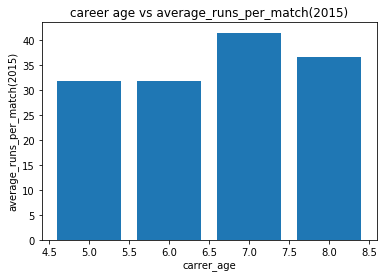

In [1047]:
plt.bar(reg_x_with_oneyear_career_age.career_age,reg_x_with_oneyear_career_age[('runs_per_match',2015)])
plt.title('career age vs average_runs_per_match(2015)')
plt.xlabel('carrer_age')
plt.ylabel('average_runs_per_match(2015)')

Text(0,0.5,'career_average_runs_per_match(2015)')

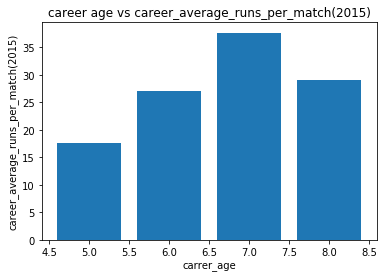

In [1048]:
plt.bar(reg_x_with_oneyear_career_age.career_age,reg_x_with_oneyear_career_age.career_runs_match)
plt.title('career age vs career_average_runs_per_match(2015)')
plt.xlabel('carrer_age')
plt.ylabel('career_average_runs_per_match(2015)')

In [1050]:
from scipy import stats


In [1055]:
x = reg_x_with_oneyear_career_age.career_runs_match

In [1056]:
stats.tstd(x)

9.55940170583372

In [1060]:
reg_x_with_oneyear_career_age.iloc[0][1:]

(age, 2015)               33.000000
(runs_per_match, 2015)     2.000000
career_runs_match          6.586706
career_age                 8.000000
Name: 0, dtype: float64

In [1062]:
train.groupby('')

,batsman_striker,player_id,season,ball,matches,runs_scored,total_outs,highest_score,Average,strike_rate,Average_1st_innings,strike_rate_1st_innings,Average_2nd_innings,strike_rate_2nd_innings,toss_win_count,30+,50+,75+,number_of_zeros,DOB,Bowling_skill,Australia,Bangladesh,England,India,Netherlands,New Zealand,Pakistan,South Africa,Sri Lanka,West Indies,Zimbabwea,Right_hand_bat,age
0,A Chopra,5,2008,55,5,42,5.0,24,8.40,76.36,10.00,76.92,2.00,66.67,3.0,0.0,0.0,0.0,0.0,9/19/1977,Right-arm offbreak,0,0,0,1,0,0,0,0,0,0,0,1,31
116,RG Sharma,326,2008,276,12,404,11.0,76,36.73,146.38,41.67,152.44,30.80,137.50,7.0,3.0,3.0,1.0,1.0,4/30/1987,Right-arm offbreak,0,0,0,1,0,0,0,0,0,0,0,1,21
117,RP Singh,331,2008,25,9,27,4.0,10,6.75,108.00,5.67,106.25,10.00,111.11,6.0,0.0,0.0,0.0,0.0,12/6/1985,Left-arm fast-medium,0,0,0,1,0,0,0,0,0,0,0,1,23
118,RR Powar,334,2008,21,1,28,0.0,28,0.00,133.33,0.00,133.33,0.00,0.00,1.0,0.0,0.0,0.0,0.0,5/20/1978,Right-arm offbreak,0,0,0,1,0,0,0,0,0,0,0,1,30
119,RR Raje,335,2008,9,3,8,0.0,6,0.00,88.89,0.00,88.89,0.00,0.00,0.0,0.0,0.0,0.0,0.0,9/3/1986,Right-arm fast-medium,0,0,0,1,0,0,0,0,0,0,0,1,22
120,RR Sarwan,337,2008,78,4,73,4.0,31,18.25,93.59,7.00,77.78,22.00,95.65,3.0,1.0,0.0,0.0,0.0,6/23/1980,Legbreak,0,0,0,0,0,0,0,0,0,1,0,1,28
121,RT Ponting,341,2008,53,4,39,4.0,20,9.75,73.58,13.00,75.00,0.00,0.00,2.0,0.0,0.0,0.0,2.0,12/19/1974,Right-arm medium,1,0,0,0,0,0,0,0,0,0,0,1,34
122,RV Uthappa,343,2008,291,14,320,9.0,48,35.56,109.97,26.40,115.79,47.00,106.21,8.0,5.0,0.0,0.0,0.0,11/11/1985,Right-arm medium,0,0,0,1,0,0,0,0,0,0,0,1,23
123,S Anirudha,345,2008,8,1,1,1.0,1,1.00,12.50,1.00,12.50,0.00,0.00,0.0,0.0,0.0,0.0,0.0,4/14/1987,,0,0,0,1,0,0,0,0,0,0,0,1,21
115,RA Jadeja,320,2008,108,9,135,7.0,36,19.29,125.00,17.25,138.00,22.00,113.79,6.0,2.0,0.0,0.0,2.0,12/6/1988,Slow left-arm orthodox,0,0,0,1,0,0,0,0,0,0,0,0,20


In [1136]:
st = reg_x.drop([('age', 2008),('age', 2009),('age', 2010),('age', 2011),('age', 2012),('age', 2013),('age', 2014),('age', 2015)],axis=1)

In [1145]:
x = st.iloc[0][1:8]

In [1147]:
stats.tstd(x)

4.733308125329245

In [1203]:
l = []
for i in range(len(st)):
    l.append(stats.tstd(st.iloc[i][1:8]))
st['std']= l

In [1208]:
(st.iloc[1][1:8])

(runs_per_match, 2008)     1.00
(runs_per_match, 2009)     1.00
(runs_per_match, 2010)    11.50
(runs_per_match, 2011)     0.00
(runs_per_match, 2012)     5.50
(runs_per_match, 2013)     0.25
(runs_per_match, 2014)     0.00
Name: 1, dtype: float64